In [ ]:
!python lr_finder.py -c config/pse_dccrn_rep_stft_big_mix.yaml
!python lr_finder.py -c config/pse_dccrn_rep_stft_big.yaml
!python lr_finder.py -c config/pse_dccrn_stft_big.yaml
!python lr_finder.py -c config/pse_dccrn_stft_big_asym.yaml
!python lr_finder.py -c config/pse_dccrn_stft_big_asym_mix.yaml
!python lr_finder.py -c config/pse_dccrn_stft_big_asym_cross.yaml

In [1]:
import json
import matplotlib.pylab as plt
import numpy as np
import plotly.express as px
import glob

In [2]:
lr_finding_list = list(glob.glob("test_results/lr_finding/*.json"))
list(enumerate(lr_finding_list))

[(0, 'test_results/lr_finding/power_law_re_lr_finding.json'),
 (1, 'test_results/lr_finding/old_powlaw_loss_lr_finding.json'),
 (2, 'test_results/lr_finding/pse_dccrn_rep_stft_big_lr_finding.json'),
 (3, 'test_results/lr_finding/pse_dccrn_stft_big_asym_lr_finding.json'),
 (4, 'test_results/lr_finding/pse_dccrn_stft_big_asym_mix_lr_finding.json'),
 (5, 'test_results/lr_finding/pse_dccrn_rep_stft_big_mix_lr_finding.json'),
 (6, 'test_results/lr_finding/pse_dccrn_stft_big_lr_finding.json'),
 (7, 'test_results/lr_finding/pse_dccrn_rep_stft_big_asym_lr_finding.json'),
 (8, 'test_results/lr_finding/powlaw_loss_asym_lr_finding.json'),
 (9, 'test_results/lr_finding/pse_dccrn_stft_big_asym_cross_lr_finding.json')]

In [11]:
with open(lr_finding_list[1], "r") as f:
    result = json.load(f)

# Get the data to plot from the history dictionary.
lrs = result["history"]["lr"]
losses = result["history"]["loss"]
min_grad_idx = result["min_grad_idx"]
lrs[min_grad_idx]

0.0004328761281083057

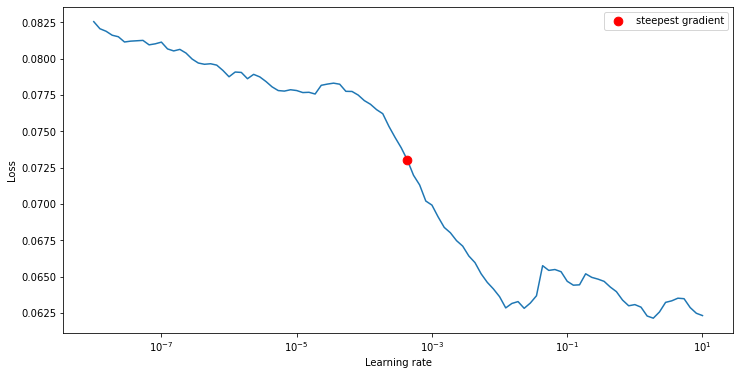

In [12]:
# Create the figure and axes object
fig, ax = plt.subplots(figsize=(12,6))

# # Plot loss as a function of the learning rate
ax.plot(lrs, losses)

ax.scatter(
    lrs[min_grad_idx],
    losses[min_grad_idx],
    s=75,
    marker="o",
    color="red",
    zorder=3,
    label="steepest gradient",
)

ax.legend()

ax.set_xscale("log")
ax.set_xlabel("Learning rate")
ax.set_ylabel("Loss")

plt.show()
plt.close()

In [13]:
fig = px.line(x=lrs, y=losses, log_x=True,
    labels={
        "x": "Learning rate (log scale)",
        "y": "Loss"
    })
fig

In [6]:
import torch
import torch.nn as nn
from torch.optim import lr_scheduler

In [7]:
class NullModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(1,1)
    

model = NullModule()
optimizer = torch.optim.Adam(model.parameters(), lr=0.003)

def plot_lr(scheduler, step=100):
    lrs = []
    for _ in range(step):
        lrs.append(optimizer.param_groups[0]['lr'])
        scheduler.step()

    fig = px.line(y=lrs, 
        labels={
        "x": "Step",
        "y": "Learning rate"
    })
    return fig

In [10]:
plot_lr(lr_scheduler.OneCycleLR(optimizer, max_lr=0.003,
                                     total_steps=100,
                                     pct_start=0.3,
                                     anneal_strategy="linear"), 100)